In [86]:
import msprime, pyslim, tskit, os
os.chdir('/project2/jnovembre/ccliu/backgroundSelection/')
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import itertools as it

from scripts.utils import *

In [78]:
Bs = [0.4, 0.6, 0.8]
Ns = [5000]
reps = list(range(1, 101))
params = [Bs, Ns, reps]
params = list(it.product(*params))

In [81]:
B_scores = []
for B, N, rep in params:
    ts_file = f'data/slim/bgs_1class/bgs_1class.B{B}_N{N}_rep{rep}.trees'
    ts = pyslim.load(ts_file).simplify()
    div = ts.diversity(mode = 'branch') / 2
    B_scores.append((B, N, rep, div / (2 * N)))
B_scores = pd.DataFrame(B_scores, columns =['true_B', 'N', 'rep', 'estimated_B']) 

In [85]:
B_scores.groupby(['true_B']).mean().estimated_B

true_B
0.4    0.410328
0.6    0.618608
0.8    0.818703
Name: estimated_B, dtype: float64

Text(0.5, 0.98, '')

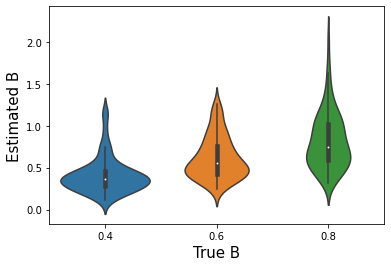

In [88]:
ax = sns.violinplot(x='true_B', 
                    y="estimated_B",
                    data=B_scores)
plt.xlabel("True B", fontsize = 15)
plt.ylabel("Estimated B", fontsize = 15)
plt.title('')
plt.suptitle('')